In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import libraries

# Import data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from PIL import ImageGrab
import scipy.stats as stat
import statsmodels.api as sm

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv('C:/Users\Moin Dalvi/Documents/EXcelR Study and Assignment Material/Data Science Assignments/Basic Statistics 1/wc-at.csv')
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [9]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


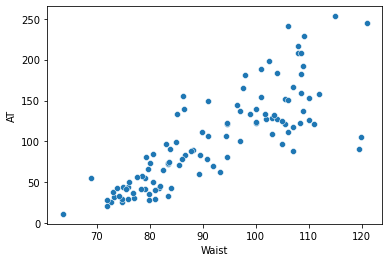

In [11]:
sns.scatterplot(x = data['Waist'], y = data['AT'])
plt.show()

# Correlation 

In [12]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

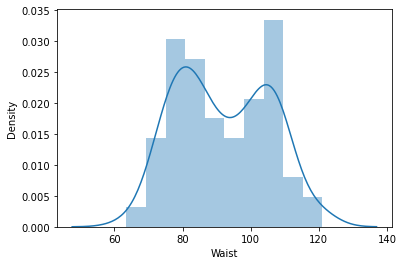

In [13]:
sns.distplot(data['Waist'], bins = 10, kde = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

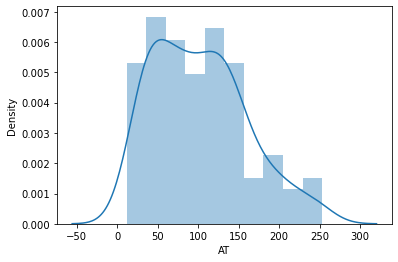

In [14]:
sns.distplot(data['AT'], bins = 10, kde = True)
plt.show

# Fitting a Linear Regression Model 

In [17]:
 model = smf.ols('AT~Waist', data = data).fit()

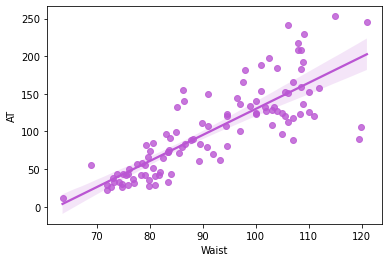

In [5]:
sns.regplot(x = 'Waist',  y = 'AT', data = data, color = 'mediumorchid')
plt.show()

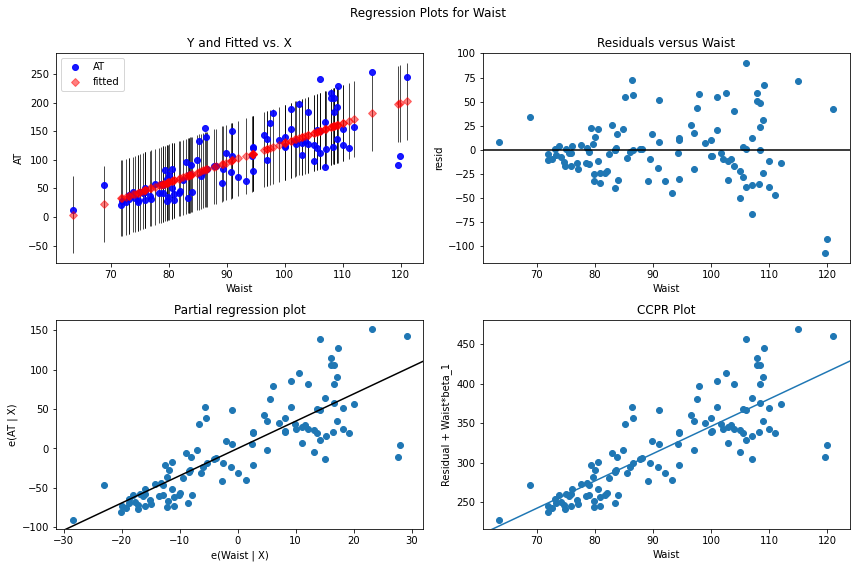

In [19]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Waist', fig=fig)

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.62e-27
Time:                        11:16:21   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [8]:
print(model.tvalues, model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [9]:
print(model.rsquared, model.rsquared_adj)

0.6700368930528429 0.6669531256981966


# Predict for new data point

In [39]:
data_predict = pd.DataFrame(pd.Series([97,103]), columns = ['Waist'])
data_predict

,Waist
0,97
1,103


In [40]:
value = model.predict(data_predict)
data_predict['AT'] = pd.DataFrame(pd.Series(value))

In [41]:
#OR
data_predict['AT'] = pd.DataFrame(pd.Series(model.predict(data_predict)))

In [42]:
data_predict

,Waist,AT
0,97,119.527873
1,103,140.281029


In [50]:
data_predict = data_predict.append(pd.DataFrame(pd.Series([150,100,24,65]),columns=['Waist']),ignore_index=True)

In [51]:
data_predict

,Waist,AT
0,97,119.527873
1,103,140.281029
2,150,NaN
3,100,NaN
4,24,NaN
5,65,NaN


In [62]:
data_predict['AT'] = model.predict(data_predict.drop('AT', axis = 1))

In [73]:
data_predict

,Waist,AT
0,97,119.527873
1,103,140.281029
2,150,302.847421
3,100,129.904451
4,24,-132.968863
5,65,8.844373


## Mean Squared Error (MSE)

In [75]:
model.mse_resid

1093.2895889842862

## Root Mean Squared Error (RMSE)

In [76]:
np.sqrt(model.mse_resid)

33.06492989534812

# WC-AT example

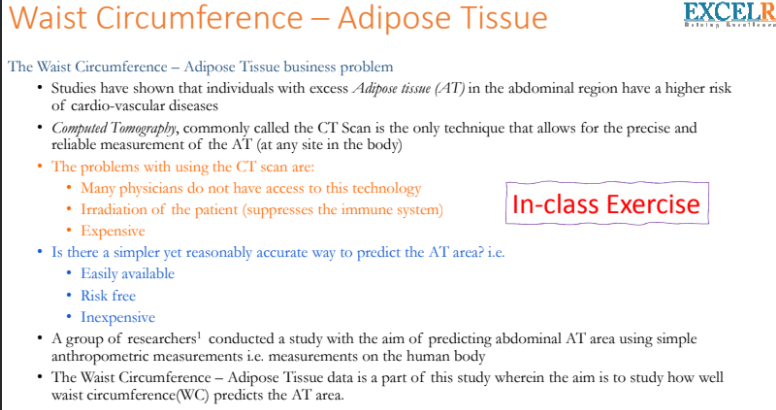

In [5]:
ImageGrab.grabclipboard()

In [24]:
wc_at = pd.read_csv('C:/Users\Moin Dalvi\Documents\EXcelR Study and Assignment Material\Data Science Assignments\Basic Statistics 1\wc-at.csv')

print(wc_at.shape,'Shape of Data Frame')
print('='*30)

display(wc_at.head(10))

(109, 2) Shape of Data Frame


,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


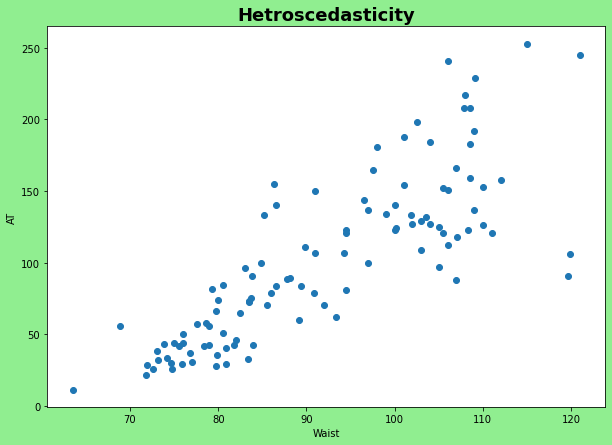

In [18]:
plt.figure(figsize = (10,7), facecolor='lightgreen')
plt.scatter(wc_at.Waist,wc_at.AT)
plt.xlabel('Waist')
plt.ylabel('AT')
plt.title('Hetroscedasticity', fontsize = 18, fontweight = 'bold')
plt.show()

In [13]:
wc_at.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


## Creating model with SKLearn

In [14]:
wc_at['Waist']

0       74.75
1       72.60
2       81.80
3       83.95
4       74.65
        ...  
104    100.10
105     93.30
106    101.80
107    107.90
108    108.50
Name: Waist, Length: 109, dtype: float64

In [16]:
x = wc_at['Waist'].values.reshape(-1,1)
x

array([[ 74.75],
       [ 72.6 ],
       [ 81.8 ],
       [ 83.95],
       [ 74.65],
       [ 71.85],
       [ 80.9 ],
       [ 83.4 ],
       [ 63.5 ],
       [ 73.2 ],
       [ 71.9 ],
       [ 75.  ],
       [ 73.1 ],
       [ 79.  ],
       [ 77.  ],
       [ 68.85],
       [ 75.95],
       [ 74.15],
       [ 73.8 ],
       [ 75.9 ],
       [ 76.85],
       [ 80.9 ],
       [ 79.9 ],
       [ 89.2 ],
       [ 82.  ],
       [ 92.  ],
       [ 86.6 ],
       [ 80.5 ],
       [ 86.  ],
       [ 82.5 ],
       [ 83.5 ],
       [ 88.1 ],
       [ 90.8 ],
       [ 89.4 ],
       [102.  ],
       [ 94.5 ],
       [ 91.  ],
       [103.  ],
       [ 80.  ],
       [ 79.  ],
       [ 83.5 ],
       [ 76.  ],
       [ 80.5 ],
       [ 86.5 ],
       [ 83.  ],
       [107.1 ],
       [ 94.3 ],
       [ 94.5 ],
       [ 79.7 ],
       [ 79.3 ],
       [ 89.8 ],
       [ 83.8 ],
       [ 85.2 ],
       [ 75.5 ],
       [ 78.4 ],
       [ 78.6 ],
       [ 87.8 ],
       [ 86.3 ],
       [ 85.5 

In [20]:
lm = LinearRegression()

x = wc_at['Waist'].values.reshape(-1,1)
y = wc_at['AT'].values.reshape(-1,1)

reg_sklearn = lm.fit(x,y)

In [37]:
y - reg_sklearn.predict(x)

array([[-1.68482516e+01],
       [-9.24170390e+00],
       [-2.43532103e+01],
       [-3.15897580e+01],
       [-1.23823657e+01],
       [-1.08575594e+01],
       [-3.47602369e+01],
       [-3.95073853e+01],
       [ 7.78391657e+00],
       [-4.98701954e+00],
       [-4.39050233e+00],
       [ 4.27033559e-01],
       [ 1.34886640e+00],
       [-1.47884040e+01],
       [-1.93906852e+01],
       [ 3.36190188e+01],
       [-2.93888286e+00],
       [-7.08293596e+00],
       [ 4.06766483e+00],
       [-1.72359399e+01],
       [-1.32318563e+01],
       [-2.35902369e+01],
       [-2.49513775e+01],
       [-3.24587698e+01],
       [-2.18049822e+01],
       [-3.18335761e+01],
       [-1.05735388e-01],
       [ 2.18433069e+01],
       [-2.59041975e+00],
       [-4.62441188e+00],
       [-2.73271273e-01],
       [ 5.65975523e-01],
       [-1.91429448e+01],
       [-9.69054169e+00],
       [-9.82217003e+00],
       [ 1.01192754e+01],
       [ 8.22528329e+00],
       [-1.12810294e+01],
       [ 1.3

In [16]:
lm1 = LinearRegression()

at_log = np.log(wc_at.AT)
x1 = wc_at['Waist'].values.reshape(-1,1)
y1 = at_log.values.reshape(-1,1)

reg_sklearn1 = lm1.fit(x1,y1)

In [18]:
print(reg_sklearn.coef_) # alpha
print(reg_sklearn.intercept_)#beta

[[3.45885939]]
[-215.98148796]


In [19]:
reg_sklearn.predict(x)

array([[ 42.56825159],
       [ 35.1317039 ],
       [ 66.95321031],
       [ 74.389758  ],
       [ 42.22236565],
       [ 32.53755936],
       [ 63.84023685],
       [ 72.48738533],
       [  3.65608343],
       [ 37.20701954],
       [ 32.71050233],
       [ 43.43296644],
       [ 36.8611336 ],
       [ 57.26840401],
       [ 50.35068522],
       [ 22.16098118],
       [ 46.71888286],
       [ 40.49293596],
       [ 39.28233517],
       [ 46.54593989],
       [ 49.83185632],
       [ 63.84023685],
       [ 60.38137746],
       [ 92.54876981],
       [ 67.64498219],
       [102.23357611],
       [ 83.55573539],
       [ 62.4566931 ],
       [ 81.48041975],
       [ 69.37441188],
       [ 72.83327127],
       [ 88.74402448],
       [ 98.08294484],
       [ 93.24054169],
       [136.82217003],
       [110.88072459],
       [ 98.77471671],
       [140.28102942],
       [ 60.7272634 ],
       [ 57.26840401],
       [ 72.83327127],
       [ 46.89182583],
       [ 62.4566931 ],
       [ 83

In [21]:
wc_at['AT'].head(10)

0    25.72
1    25.89
2    42.60
3    42.80
4    29.84
5    21.68
6    29.08
7    32.98
8    11.44
9    32.22
Name: AT, dtype: float64

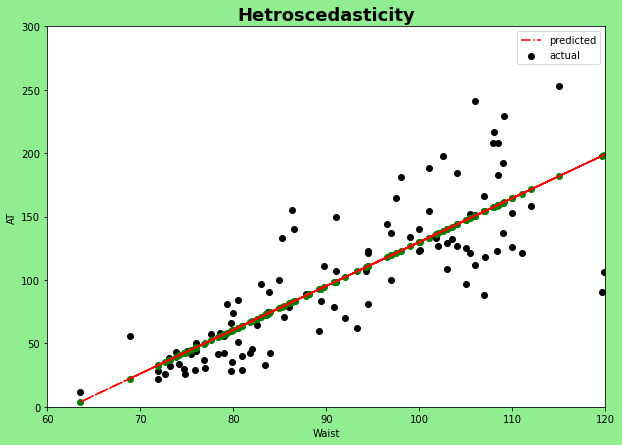

In [21]:
plt.figure(figsize=(10,7), facecolor ='lightgreen')
plt.scatter(wc_at.Waist,wc_at.AT, color = 'black', label='actual')
plt.plot(wc_at.Waist, reg_sklearn.predict(x), color = 'red', linestyle='-.', label = 'predicted')
plt.scatter(wc_at.Waist, reg_sklearn.predict(x), color = 'green')
plt.xlabel('Waist')
plt.ylabel("AT")
plt.xlim(60,120)
plt.ylim(0,300)
plt.title('Hetroscedasticity', fontsize = 18, fontweight = 'bold')
plt.legend(loc='best')
plt.show()

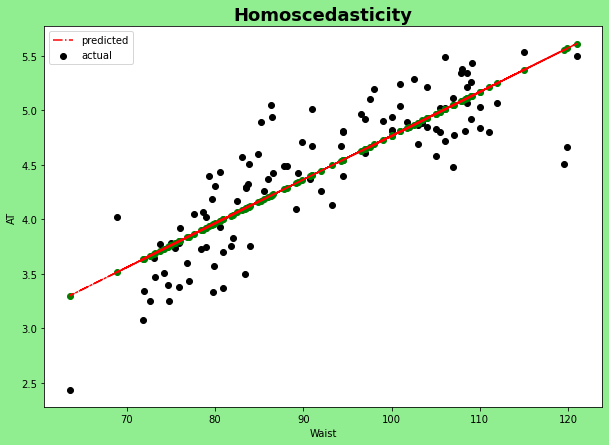

In [18]:
plt.figure(figsize=(10,7), facecolor ='lightgreen')
plt.scatter(wc_at.Waist,at_log, color = 'black', label='actual')
plt.plot(wc_at.Waist, reg_sklearn1.predict(x1), color = 'red', linestyle='-.', label = 'predicted')
plt.scatter(wc_at.Waist, reg_sklearn1.predict(x1), color = 'green')
plt.xlabel('Waist')
plt.ylabel("AT")
plt.title('Homoscedasticity', fontsize = 18, fontweight = 'bold')
plt.legend(loc='best')
plt.show()

## Model Validation

In [25]:
pred_train_lm = reg_sklearn.predict(x)
r2_score(wc_at['AT'],pred_train_lm)

0.6700368930528429

# Model with Statsmodels

In [27]:
wc_at

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [21]:
first_model = smf.ols('AT~Waist', data=wc_at).fit()
#pred_statsmodel = first_model.predict(wc_at['Waist'])
# r2_score(wc_at['AT'],pred_train_lm)

In [29]:
first_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [33]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.62e-27
Time:                        21:23:48   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

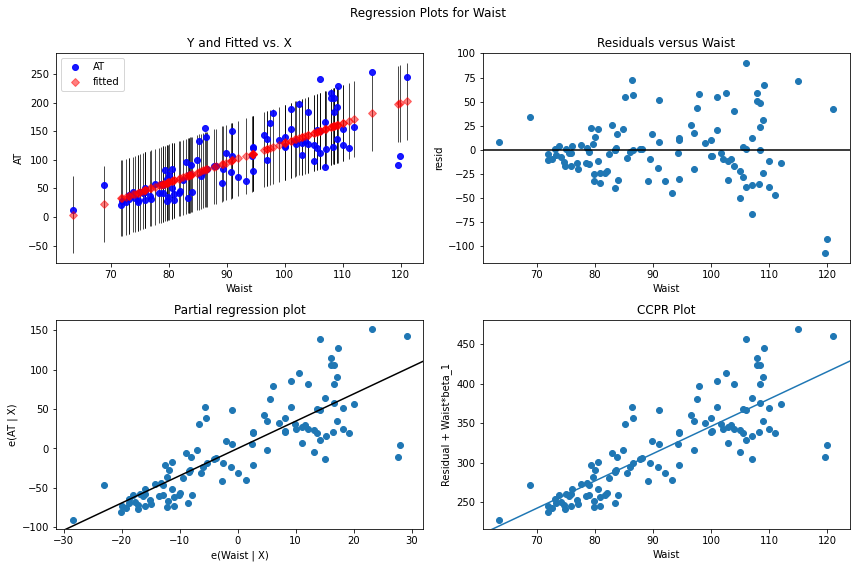

In [22]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(first_model, 'Waist', fig=fig)

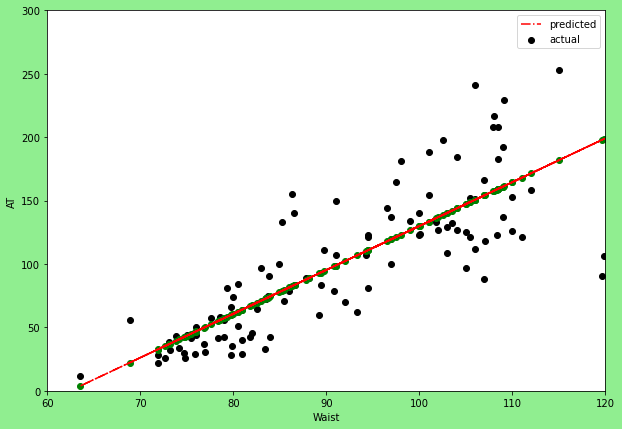

In [23]:
plt.figure(figsize=(10,7), facecolor ='lightgreen')
plt.scatter(wc_at.Waist,wc_at.AT, color = 'black', label='actual')
plt.plot(wc_at.Waist, first_model.predict(wc_at['Waist']), color = 'red', linestyle='-.', label = 'predicted')
plt.scatter(wc_at.Waist, first_model.predict(wc_at['Waist']), color = 'green')
plt.xlabel('Waist')
plt.ylabel("AT")
plt.xlim(60,120)
plt.ylim(0,300)
plt.legend(loc='best')
plt.show()

### Applying Transformations

### y = $\alpha$*log(x) +$\beta$

In [48]:
model2 = smf.ols('AT~np.log(Waist)',data=wc_at).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           6.80e-28
Time:                        19:57:23   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

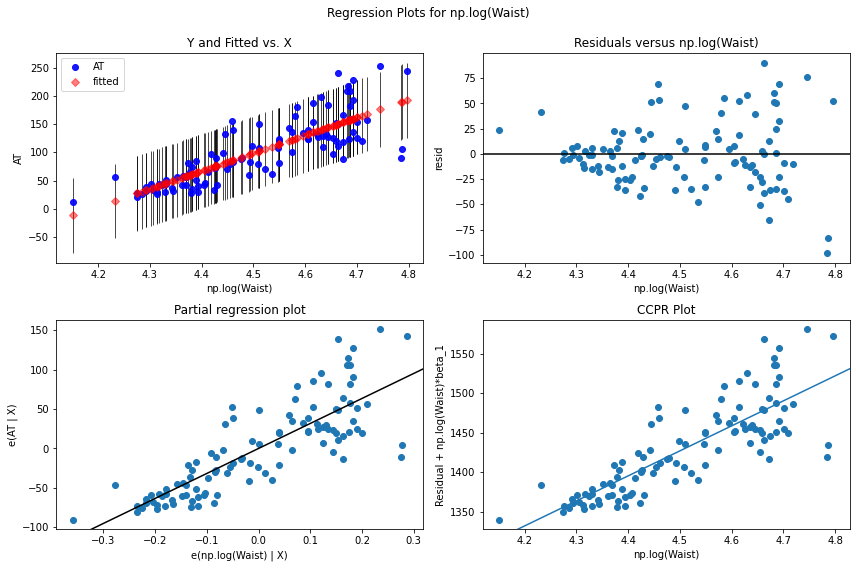

In [27]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model2, 'np.log(Waist)', fig=fig)

### log(y) = $\alpha$*x +$\beta$

In [50]:
model3 = smf.ols('np.log(AT)~Waist',data=wc_at).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           2.68e-30
Time:                        19:57:35   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

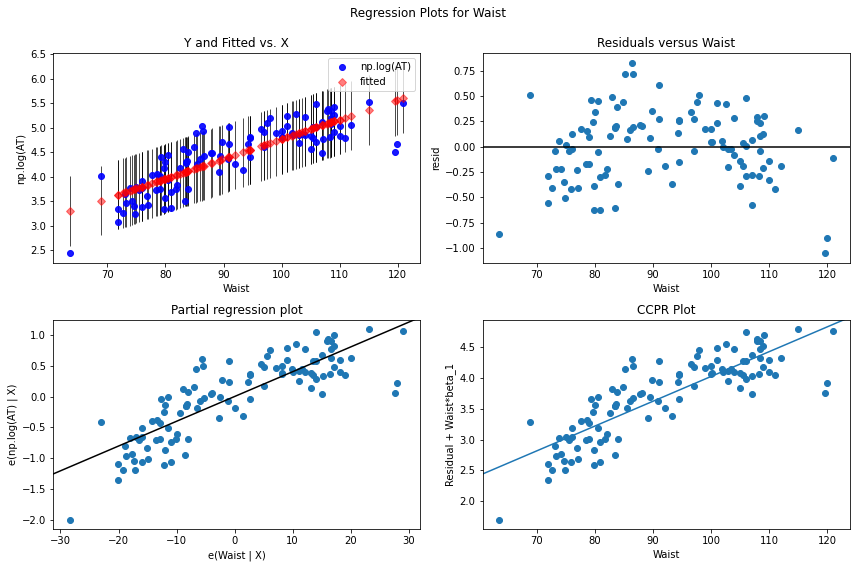

In [29]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model3, 'Waist', fig=fig)

### log(y) = $\alpha$*x + $\alpha$*$x^2$ +$\beta$ 

In [40]:
model4.resid

0     -0.357669
1     -0.180987
2     -0.344917
3     -0.470122
4     -0.201385
         ...   
104   -0.081699
105   -0.551896
106   -0.051878
107    0.299251
108    0.293888
Length: 109, dtype: float64

In [55]:
wc_at['Waist_Square'] = wc_at.Waist**2
model4 = smf.ols('np.log(AT)~Waist+Waist_Square',data=wc_at).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           1.80e-35
Time:                        19:58:30   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist            0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Square    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

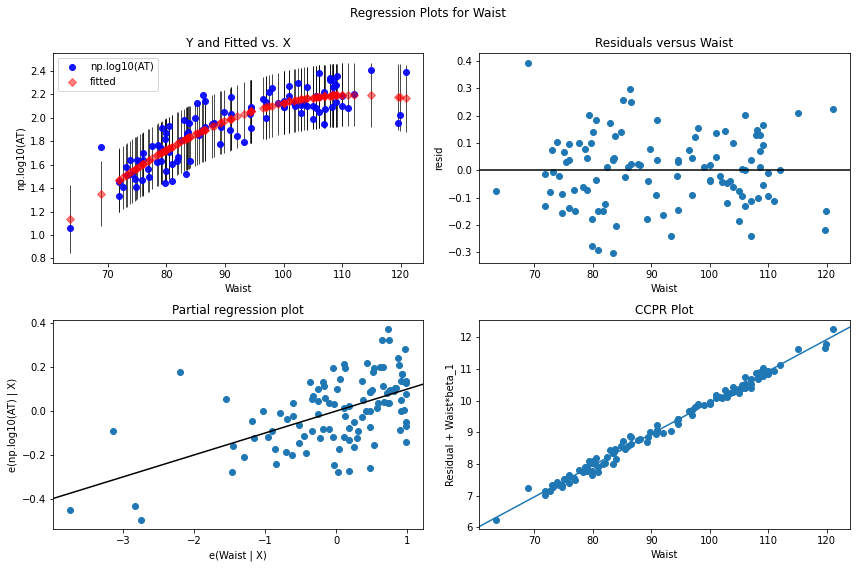

In [52]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model4, 'Waist', fig=fig)

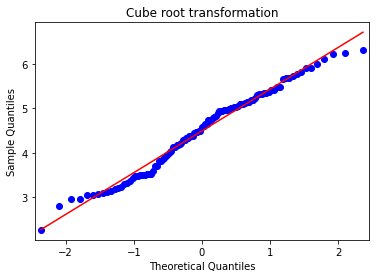

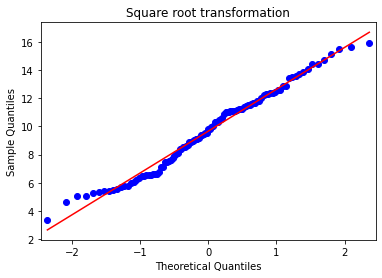

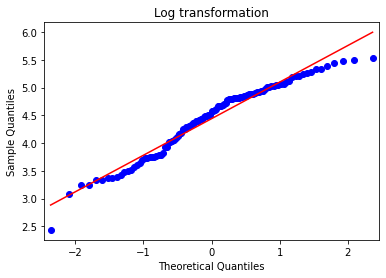

In [26]:
sm.qqplot(np.cbrt(wc_at['AT']), line = 'r')
plt.title('Cube root transformation')
sm.qqplot(np.sqrt(wc_at['AT']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.log(wc_at['AT']), line = 'r')
plt.title('Log transformation')
plt.show()

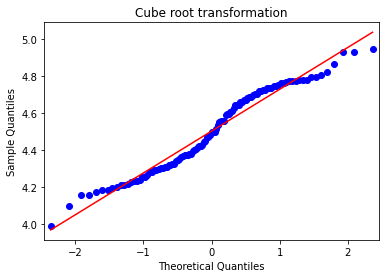

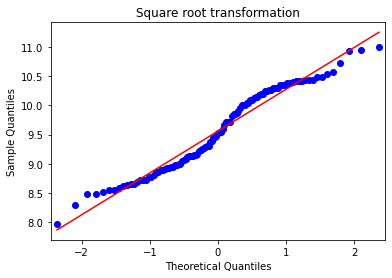

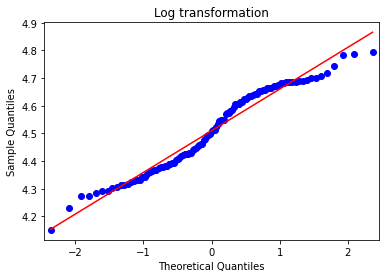

In [27]:
sm.qqplot(np.cbrt(wc_at['Waist']), line = 'r')
plt.title('Cube root transformation')
sm.qqplot(np.sqrt(wc_at['Waist']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.log(wc_at['Waist']), line = 'r')
plt.title('Log transformation')
plt.show()

# BoxCox Transformation

In [19]:
wc_at

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [37]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

In [39]:
df_scaled = wc_at.copy()
col_names = ['Waist', 'AT']
features = df_scaled[col_names]
display(df_scaled)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [40]:
df_scaled[col_names] = scaler.fit_transform(wc_at.values)
df_scaled

,Waist,AT
0,-1.311599,-1.652621
1,-1.499032,-1.645969
2,-0.724012,-1.090843
3,-0.552390,-1.085099
4,-1.320227,-1.498402
...,...,...
104,0.641498,0.529301
105,0.157806,-0.591516
106,0.758558,0.660720
107,1.166912,1.588604


In [43]:
model5 = smf.ols('AT~Waist',data=df_scaled).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     286.3
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           5.10e-32
Time:                        19:50:52   Log-Likelihood:                -83.718
No. Observations:                 109   AIC:                             171.4
Df Residuals:                     107   BIC:                             176.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     3.4e-16      0.050   6.74e-15      1.000      -0.100       0.100
Waist          0.8532      0.050     16.921      0.000       0.753       0.953
==============================================================================
Omnibus:                        1.055   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.601
Skew:                          -0.120   Prob(JB):                        0.740
Kurtosis:                       3.274   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

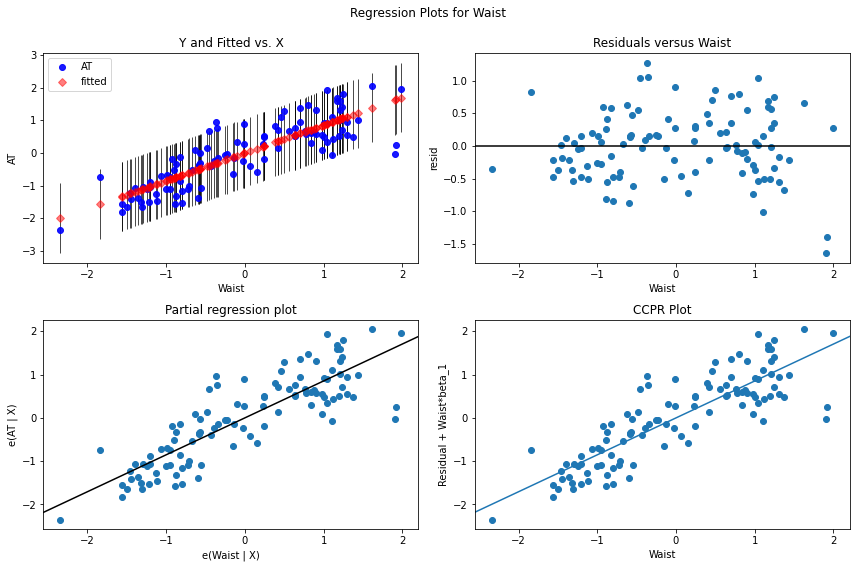

In [44]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model5, 'Waist', fig=fig)